In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from plotData import *
from sigmoid import *
from costFunction import *
from plotDecisionBoundary import *
from predict import *

# LOGISTIC REGRESSION

In [227]:
data=pd.read_csv('data_logistic.txt',sep=',',header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [228]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [229]:
X,y=np.column_stack((np.ones(data.shape[0]),data.values[:,:2])),data.values[:,2][:,np.newaxis]

## VISUALIZE DATA

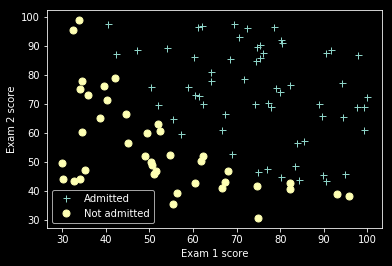

In [230]:
plotData(X,y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not admitted'])

## SIGMOID FUNCTION

In [231]:
sigmoid(0)

0.5

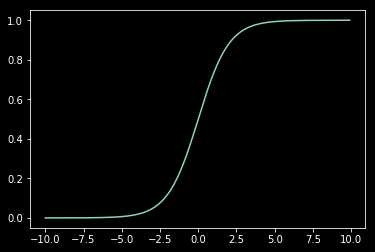

In [232]:
z=np.arange(-10,10,0.1)
plt.plot(z,sigmoid(z))
plt.savefig('sigmoid.png')

## COST FUNCTION AND GRADIENT

In [233]:
theta_ini=np.zeros((X.shape[1]))
J_ini,grad_ini=costFunction(theta_ini,X,y)
print('Cost at initial theta (zeros): ',J_ini)
print('Gradient at initial theta (zeros):\n',grad_ini)

Cost at initial theta (zeros):  0.6931471805599452
Gradient at initial theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]


## LEARNING

In [234]:
res=optimize.minimize(costFunction,theta_ini,args=(X,y),method='Newton-CG',jac=True,options={'maxiter':400})
res

     fun: 0.20349770159004257
     jac: array([3.13973230e-07, 1.77861702e-05, 1.88806385e-05])
 message: 'Optimization terminated successfully.'
    nfev: 81
    nhev: 0
     nit: 31
    njev: 273
  status: 0
 success: True
       x: array([-25.16126991,   0.2062312 ,   0.20147109])

In [235]:
J_fin=res.fun
theta_fin=res.x
print('Cost at theta found by optimization algorithm: ', J_fin)
print('theta:\n', theta_fin)

Cost at theta found by optimization algorithm:  0.20349770159004257
theta:
 [-25.16126991   0.2062312    0.20147109]


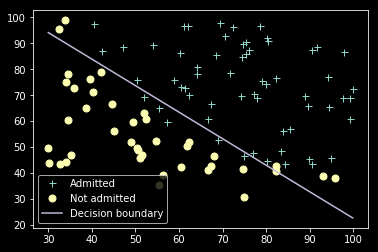

In [236]:
plotDecisionBoundary(theta_fin,X,y)
plt.legend(['Admitted','Not admitted','Decision boundary'])

In [237]:
prob,_=predict(theta_fin,np.array([1,45,85]))
print('For a student with scores 45 and 85, we predict an admission probability of',prob)
prob,p=predict(theta_fin,X)
print('Train Accuracy:',np.mean(p==y))

For a student with scores 45 and 85, we predict an admission probability of [0.77629016]
Train Accuracy: 0.89


## ADVANCED OPTIMIZATION ALGORITHMS

In [238]:
X_train,X_test,y_train,y_test=train_test_split(X[:,1:],y,test_size=0.5)

In [239]:
clf=LogisticRegression(C=10000,solver='newton-cg') # C=10000 <=> no regularization
clf.fit(X_train,np.ravel(y_train))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
theta=np.hstack((clf.intercept_,np.ravel(clf.coef_)))
print('Theta: [%.2f, %.2f, %.2f]' % (theta[0],theta[1],theta[2]))
print('For a student with scores 45 and 85, we predict an admission probability of %.4f' % (100*clf.predict_proba(np.array([[45,85]]))[0][1]))

Theta: [-23.30, 0.20, 0.18]
For a student with scores 45 and 85, we predict an admission probability of 65.6179


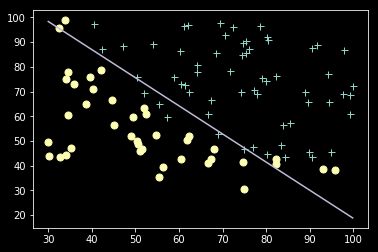

In [248]:
plotDecisionBoundary(theta,X,y)

In [249]:
print('%.2f' % clf.score(X[:,1:],y))
print('%.2f' % clf.score(X_train,y_train)) 
print('%.2f' % clf.score(X_test,y_test))

0.89
0.86
0.92


In [244]:
82

82